In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import pandas as pd
import seaborn as sn
import tensorflow as tf
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input, decode_predictions

In [3]:
img_SIZE = [224, 224]

train_path = '/kaggle/input/brain-tumor/Training'
test_path = '/kaggle/input/brain-tumor/Testing'

In [4]:
mobileNet = MobileNet(input_shape=img_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
for layer in mobileNet.layers:
    layer.trainable = False

In [6]:
folders = glob('/kaggle/input/brain-tumor/Training/*')

In [7]:
x = Flatten()(mobileNet.output)
x = Dense(1024,activation='relu')(x)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=mobileNet.input, outputs=prediction)

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

In [10]:
adam = Adam(lr=0.0001)

In [11]:
model.compile(
  loss='categorical_crossentropy',
  optimizer= adam,
  metrics=['accuracy']
)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dataset = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_dataset = ImageDataGenerator(rescale = 1./255)

In [13]:
training_set = train_dataset.flow_from_directory('/kaggle/input/brain-tumor/Training',
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

test_set = test_dataset.flow_from_directory('/kaggle/input/brain-tumor/Testing',
                                            target_size = (224, 224),
                                            batch_size = 1,
                                            class_mode = 'categorical')

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [14]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
45/45 [==============================] - 40s 790ms/step - loss: 13.0573 - accuracy: 0.7108 - val_loss: 5.3915 - val_accuracy: 0.6396
Epoch 2/50
45/45 [==============================] - 37s 815ms/step - loss: 0.6759 - accuracy: 0.8983 - val_loss: 3.1965 - val_accuracy: 0.7614
Epoch 3/50
45/45 [==============================] - 36s 799ms/step - loss: 0.3746 - accuracy: 0.9338 - val_loss: 2.9937 - val_accuracy: 0.7640
Epoch 4/50
45/45 [==============================] - 37s 826ms/step - loss: 0.3499 - accuracy: 0.9251 - val_loss: 2.7141 - val_accuracy: 0.8020
Epoch 5/50
45/45 [==============================] - 37s 830ms/step - loss: 0.2294 - accuracy: 0.9488 - val_loss: 4.0656 - val_accuracy: 0.7513
Epoch 6/50
45/45 [==============================] - 37s 828ms/step - loss: 0.1189 - accuracy: 0.9707 - val_loss: 2.7265 - val_accuracy: 0.8020
Epoch 7/50
45/45 [==============================] - 36s 805ms/step - loss: 0.0832 - accuracy: 0.9770 - val_loss: 3.5139 - val_accuracy: 0.761

In [15]:
test_loss,test_acc = model.evaluate(test_set, verbose=2)
print('\nTest accuracy:', test_acc)

394/394 - 2s - loss: 2.8616 - accuracy: 0.8198 - 2s/epoch - 5ms/step

Test accuracy: 0.8197969794273376


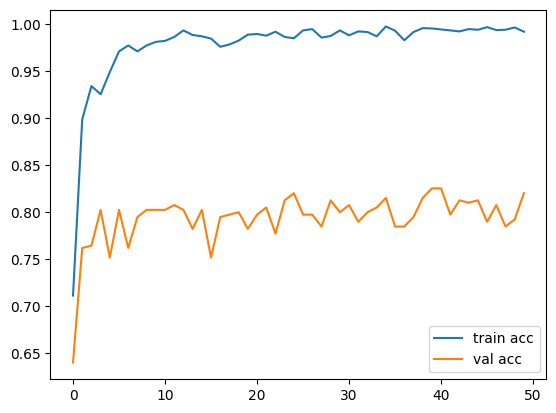

In [16]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

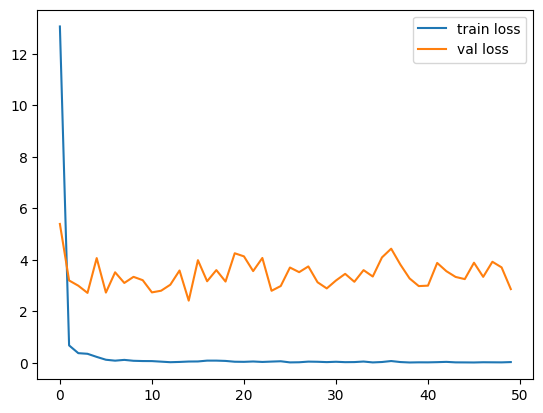

In [17]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend() 
plt.show()

In [18]:
from tensorflow.keras.models import load_model

model.save('mobileNet.keras')

# **Manually Check**

In [55]:
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2

In [56]:
from tensorflow.keras.models import load_model
model = load_model('/kaggle/working/mobileNet.keras')

In [57]:
dataset_path = '/kaggle/input/brain-tumor/Training'
class_folders = os.listdir(dataset_path)
for class_folder in class_folders:
    print(f'Class: {class_folder}')

Class: no_tumor
Class: pituitary_tumor
Class: meningioma_tumor
Class: glioma_tumor


In [58]:
from IPython.display import display, Markdown

1/1 [==============================] - 0s 431ms/step


<h3 style='color:green;'>Predicted class: glioma_tumor</h3>

<h3 style='color:blue;'>Confidence: 99.07%</h3>

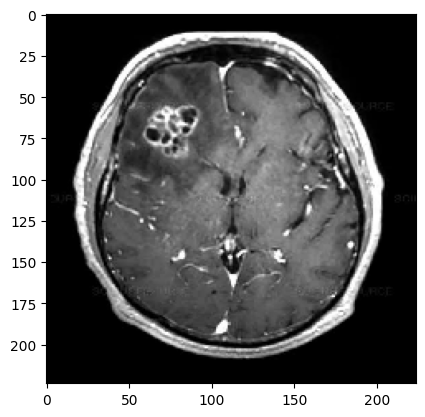

In [59]:
imagePath = "/kaggle/input/brain-tumor/Testing/glioma_tumor/image(21).jpg"

img = image.load_img(imagePath, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

predictions = model.predict(x)

class_labels = ['no_tumor', 'pituitary_tumor', 'meningioma_tumor', 'glioma_tumor']
predicted_class_index = np.argmax(predictions)
predicted_class_label = class_labels[predicted_class_index]
confidence = predictions[0][predicted_class_index]

markdown_text = f"<h3 style='color:green;'>Predicted class: {predicted_class_label}</h3>"
display(Markdown(markdown_text))

markdown_text2 = f"<h3 style='color:blue;'>Confidence: {confidence*100:.2f}%</h3>"
display(Markdown(markdown_text2))

plt.imshow(img)
plt.show()

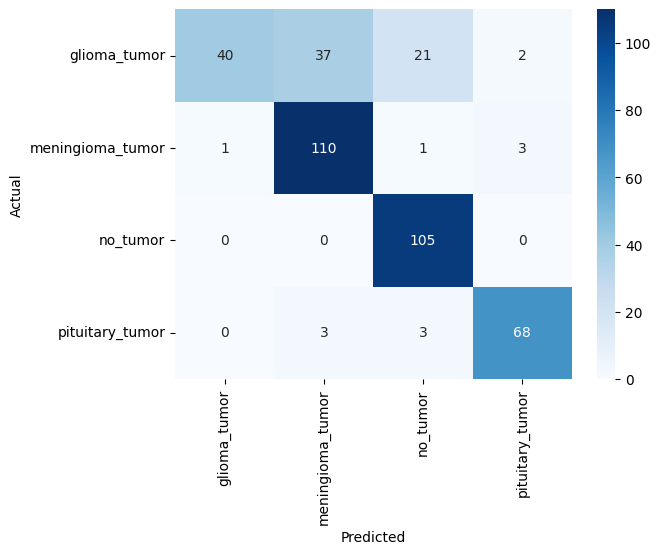

<h3 style='color:green;'>Test Accuracy: 81.98%</h3>

In [60]:
model = tf.keras.models.load_model("/kaggle/working/mobileNet.keras")
filenames = test_set.filenames
y_prob = []
y_act = []
test_set.reset()
nb_samples = len(test_set)

for _ in range(nb_samples):
    X_test, Y_test = test_set.next()
    y_prob.append(model.predict(X_test, verbose=0))  # Set verbose to 0 to suppress progress bars
    y_act.append(Y_test)

predicted_class = [list(training_set.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(training_set.class_indices.keys())[i.argmax()] for i in y_act]

out_df = pd.DataFrame(np.vstack([predicted_class, actual_class]).T, columns=['predicted_class', 'actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'], out_df['predicted_class'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, cmap='Blues', annot=True, fmt='d')
plt.show()

test_accuracy = (np.diagonal(confusion_matrix).sum() / confusion_matrix.sum().sum() * 100)

markdown_text3 = f"<h3 style='color:green;'>Test Accuracy: {test_accuracy:.2f}%</h3>"

display(Markdown(markdown_text3))